In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import DecisionTreeDiscretiser

In [3]:
X, y = fetch_openml(name='house_prices', version=1, return_X_y=True, as_frame=True)

In [6]:
X=X.drop([ 'Id'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
from feature_engine.discretisation import DecisionTreeDiscretiser
disc=DecisionTreeDiscretiser(bin_output="prediction",cv=3,scoring='neg_mean_squared_error',
                             variables=['LotArea','GrLivArea'],
                             regression=True
                             )

In [9]:
disc.fit(X_train,y_train)

DecisionTreeDiscretiser(variables=['LotArea', 'GrLivArea'])

In [10]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [12]:
train_t[['LotArea', 'GrLivArea']].head()

,LotArea,GrLivArea
254,144174.283688,152471.713568
1066,144174.283688,191760.966667
638,176117.741848,97156.250000
799,144174.283688,202178.409091
380,144174.283688,202178.409091


In [13]:
disc.binner_dict_

{'LotArea': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'GrLivArea': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error')}

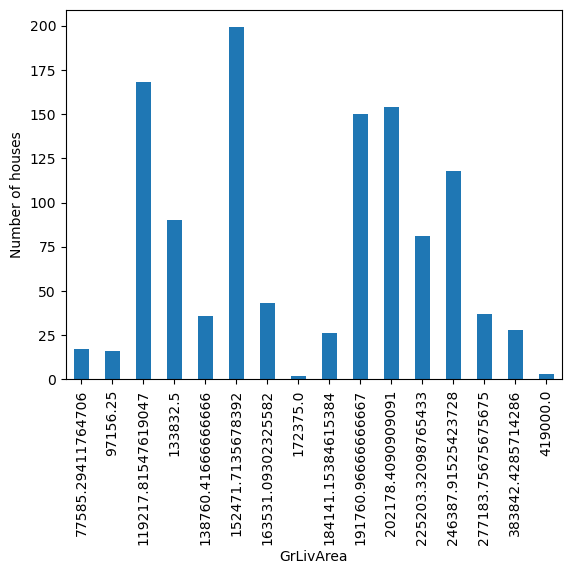

In [14]:
import matplotlib.pyplot as plt
train_t.groupby('GrLivArea')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')
plt.show()

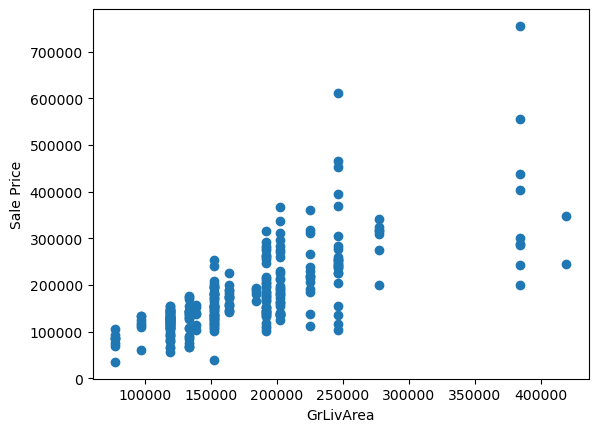

In [15]:
plt.scatter(test_t['GrLivArea'], y_test)
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.show()

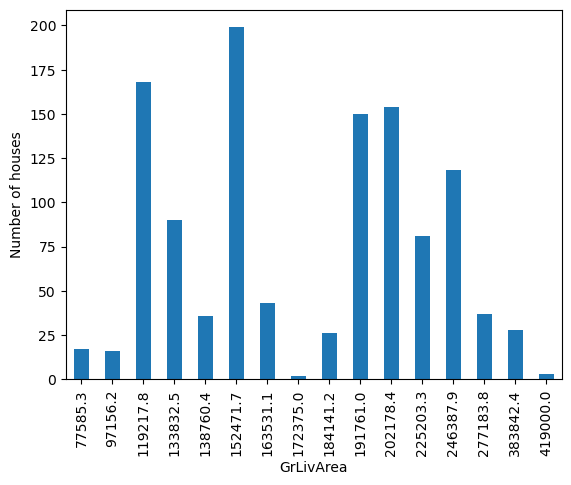

In [16]:
disc = DecisionTreeDiscretiser(
    bin_output="prediction",
    precision=1,
    cv=3,
    scoring='neg_mean_squared_error',
    variables=['LotArea', 'GrLivArea'],
    regression=True)

disc.fit(X_train, y_train)

train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

train_t.groupby('GrLivArea')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')
plt.show()

In [17]:
disc = DecisionTreeDiscretiser(
    bin_output="bin_number",
    cv=3,
    scoring='neg_mean_squared_error',
    variables=['LotArea', 'GrLivArea'],
    regression=True,
)

# fit the transformer
disc.fit(X_train, y_train)

DecisionTreeDiscretiser(bin_output='bin_number',
                        variables=['LotArea', 'GrLivArea'])

In [18]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

print(train_t[['LotArea', 'GrLivArea']].head())

      LotArea  GrLivArea
254         0          5
1066        0          8
638         1          1
799         0          9
380         0          9
